# Trabajo Semana 5 - Deep learning

Asignatura: Deep Learning

Especialización en Inteligencia Artificial

Realizado por: Michael Andrés Mora Poveda

El objectivo de este trabajo es construir una red neuronal secuencial para el dataset de dígitos escritos a manos, conocido como MNIST. Además, la idea es generar un file exportable para la productivización del modelo entrenado. Para esto utilizaremos Tensorflow y Keras.

Nota: Se toma como referencia algunos libros guía junto al notebook compartido para esta semana por parte del Docente.



### 1. Descripción del dataset e importación de librerías

Para empezar, vamos a importar las librerías clásicas y el dataset correspondiente:

In [1]:
import tensorflow as tf

2023-06-10 01:22:06.534786: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
import logging
logging.basicConfig(level=logging.INFO)
from colorlog import ColoredFormatter

In [4]:
logger = logging.getLogger()
formatter = ColoredFormatter(
    "%(log_color)s%(levelname)s:%(message)s%(reset)s",
    datefmt=None,
    reset=True,
    log_colors={
        'DEBUG':    'cyan',
        'INFO':     'green',
        'WARNING':  'yellow',
        'ERROR':    'red',
        'CRITICAL': 'red,bg_white',
    },
    secondary_log_colors={},
    style='%'
)

handler = logging.StreamHandler()
handler.setFormatter(formatter)

logger.addHandler(handler)


Upload the MNIST Dataset:

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Ahora, normalizamos nuestras imágenes de 28x28 píxeles para que queden entre 0 y 1:

In [6]:
x_train = x_train / 255
x_test = x_test / 255

Vamos a imprimir de forma iterativa algunas imágenes aleatorias en escala de grises:

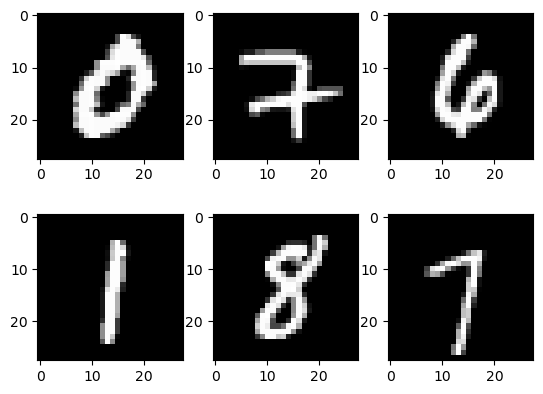

In [7]:
for k in range(1, 7):
    plt.subplot(2,3,k)
    plt.imshow(x_train[k + 36], cmap=plt.get_cmap('gray'))
    # ------------------
plt.show()

Dimensiones de nuestro dataset (Veremos que el 85% de las imágenes son para el training):

In [8]:
logging.info("La dimensión del dataset x_train es de: {}".format(x_train.shape))
logging.info("La dimensión del dataset x_test es de: {}".format(x_test.shape))
logging.info("La dimensión del dataset x_train es de: {}".format(y_train.shape))
logging.info("La dimensión del dataset x_test es de: {}".format(y_test.shape))

INFO:root:La dimensión del dataset x_train es de: (60000, 28, 28)
INFO:La dimensión del dataset x_train es de: (60000, 28, 28)
INFO:root:La dimensión del dataset x_test es de: (10000, 28, 28)
INFO:La dimensión del dataset x_test es de: (10000, 28, 28)
INFO:root:La dimensión del dataset x_train es de: (60000,)
INFO:La dimensión del dataset x_train es de: (60000,)
INFO:root:La dimensión del dataset x_test es de: (10000,)
INFO:La dimensión del dataset x_test es de: (10000,)


### 2. Construcción y entrenamiento del modelo:

Para empezar, vamos a importar las librerías clásicas y el dataset correspondiente:

Luego, construiremos la arquitectura de la red neuronal con las siguientes especificaciones:

* Se instancia una red neuronal secuencial
* Se aplana a través de Flatten el vector de 2D a 1D
* Se establece una capa intermedia de 128 neuronas (nodos) para el training
* Se genera un ouput layer o capa final con 10 salidas para los 10 dígitos

In [9]:
modelo = Sequential()
modelo.add(Flatten(input_shape=(28, 28)))
modelo.add(Dense(128, activation='relu'))
modelo.add(Dense(10, activation='softmax'))

Con esta instanciación, compilamos y entrenamos el modelo, para esto utilizaremos el optimizador Adam para utilizar
el gradiente estocástico descendente para llegar a la convergencia del modelo.

Además, vamos a entrenar el modelo 10 veces (epochs) con lotes de 32 muestras (batch size):

In [10]:
optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.02)

In [11]:
modelo.compile(optimizer = optimizer_adam, 
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy']
              )

In [12]:
modelo.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3293 - accuracy: 0.9110 - val_loss: 0.2776 - val_accuracy: 0.9255
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2564 - accuracy: 0.9355 - val_loss: 0.2510 - val_accuracy: 0.9420
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2423 - accuracy: 0.9405 - val_loss: 0.2710 - val_accuracy: 0.9361
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2380 - accuracy: 0.9428 - val_loss: 0.3058 - val_accuracy: 0.9301
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2272 - accuracy: 0.9458 - val_loss: 0.3113 - val_accuracy: 0.9427
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2268 - accuracy: 0.9464 - val_loss: 0.2803 - val_accuracy: 0.9424
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2247 - accuracy: 0.9487 - val_loss: 0.3074 - val_accuracy:

In [13]:
test_loss, test_accuracy = modelo.evaluate(x_test, y_test)
print(f"Pérdida en el conjunto de prueba: {test_loss}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

313/313 [==============================] - 0s 598us/step - loss: 0.3033 - accuracy: 0.9444
Pérdida en el conjunto de prueba: 0.3032649755477905
Precisión en el conjunto de prueba: 0.9444000124931335


Después de que el algoritmo recorrió la red neuronal 10 veces con 1875 iteraciones por cada epoch, vemos que el progreso en obtener un mejor performance del modelo tuvo los siguientes resultados:

* Tiempo de ejecución: 2.1 Segundos por cada step
* Pérdida final (Loss) de 0.0164, resultado de la diferencia entre valores reales y las predicciones
* Accuracy: 0.9949, este valor indica que tan bien se ajustó el modelo al training set
* Pérdida final del validation set (val_loss) de 0.0747
* Val_accuracy: 0.9813, este valor indica que tan bien se ajustó el modelo al validation set

En general, vemos un buen rendimiento del modelo tanto en calidad y tiempos de procesamiento, pero debemos tener cuidado con un posible overfitting.

### 3. Exportación del modelo con hp5y

Ahora, vamos a exportar nuestro modelo con extensión h5py, para luego importarlo (simulando una parte del deploy en producción del modelo utilizándolo para nuevas predicciones):

In [14]:
import h5py
from keras.models import load_model

In [15]:
# Nota: Este modelo se guarda en la misma ubicación que el notebook actual:
modelo.save('red_neuronal_mnist.h5')

#### 3.1 Carga del modelo:

Vamos a cargar el modelo y correr de nuevo algunas líneas de validación sobre su calidad:

In [16]:
# Carga del modelo:
productive_model = load_model('red_neuronal_mnist.h5')

In [17]:
# Evaluación el modelo.
loss,accuracy = productive_model.evaluate(x_test,y_test)
 
print('\ntest loss',loss)
print('accuracy',accuracy)

313/313 [==============================] - 0s 604us/step - loss: 0.3033 - accuracy: 0.9444

test loss 0.3032649755477905
accuracy 0.9444000124931335


In [18]:
# Modelo de entrenamiento,ajustar el modelo
productive_model.fit(x_train,y_train,batch_size=64,epochs=2)

Epoch 1/2
938/938 [==============================] - 1s 1ms/step - loss: 0.1400 - accuracy: 0.9644
Epoch 2/2
938/938 [==============================] - 1s 1ms/step - loss: 0.1356 - accuracy: 0.9656


En la anterior línea podemos apreciar que gracias a este modelo importado, la función de pérdida y accuracy son bastante buenas en general. (Tener cuidado con el overfitting!).

Ahora, guardaremos los pesos (weights) asociados a las redes neuronales y los cargaremos de nuevo:

In [19]:
# Guardar y cargar weights (pesos), se generan en la misma ubicación que este notebook:
productive_model.save_weights('productive_model_weights.h5')
productive_model.load_weights('productive_model_weights.h5')

In [20]:
# Guardar la estructura de la red y visualizarla en formato JSON:
from keras.models import model_from_json
json_string = productive_model.to_json() 
print(json_string)

{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28], "dtype": "float32", "sparse": false, "ragged": false, "name": "flatten_input"}}, {"class_name": "Flatten", "config": {"name": "flatten", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 28, 28], "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_n

Ahora, a través de la función summary podemos ver todas las capas del modelo y el total de parámetros:

In [21]:
print(productive_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
prediccion = productive_model.predict(x_test)

313/313 [==============================] - 0s 616us/step


Ahora, vamos a ingresar a nuestro modelo las imágenes que visualizamos previamente en la celda 7:

--- Array de la predicción de la imagen número 1
Array con probabilidad para cad dígito: 
[9.3147519e-30 9.9926168e-01 7.2327338e-04 1.3767991e-14 1.7057412e-06
 6.2124336e-06 7.6895029e-10 7.1552490e-06 3.9298226e-12 1.9182216e-09]
--- Suma total de la predicción para la imagen número 1.0
------------------
--- Array de la predicción de la imagen número 2
Array con probabilidad para cad dígito: 
[2.1844344e-36 1.3292941e-08 2.6272079e-02 9.7372788e-01 0.0000000e+00
 2.3520296e-20 3.4283704e-31 9.6734169e-08 2.0626768e-14 2.3648140e-35]
--- Suma total de la predicción para la imagen número 1.0
------------------
--- Array de la predicción de la imagen número 3
Array con probabilidad para cad dígito: 
[0.0000000e+00 1.0000000e+00 1.7014215e-14 2.0603507e-25 7.0588787e-12
 1.1616410e-15 1.1987761e-15 1.3540906e-17 4.5600900e-21 3.4240569e-25]
--- Suma total de la predicción para la imagen número 1.0
------------------
--- Array de la predicción de la imagen número 4
Array con probabilida

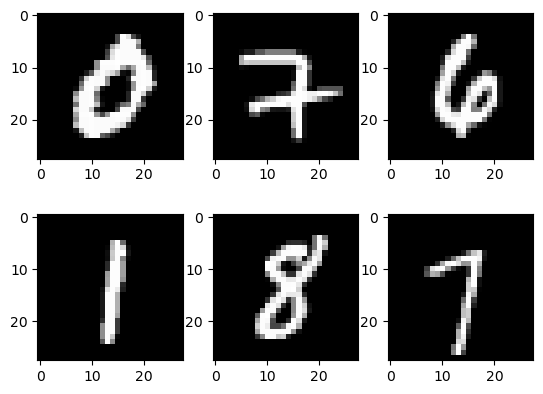

In [23]:
for k in range(1, 7):
    print("--- Array de la predicción de la imagen número {}".format(k))
    print("Array con probabilidad para cad dígito: ")
    print(prediccion[k + 36])
    print("--- Suma total de la predicción para la imagen número {}".format(np.sum(prediccion[k + 36])))
    print("------------------")
    plt.subplot(2,3,k)
    plt.imshow(x_train[k + 36], cmap=plt.get_cmap('gray'))
    # ------------------
plt.show()

## Parte dos:

### **Realice lo siguiente:**


*   Modifique el tipo de optimizador por ejemplo optimizer='adam'
*   Modifique los valores de learning rate, ejemplo lr=0.001

*   Modifique epochs,batch_size,ejemplo epochs=10, batch_size=200

*   Agregue una capa oculta al modelo con 784 neuronas.

*   Modifique Dropout, ejemplo Dropout=0.2. Esto permite excluir aleatoriamente el 20% de las neuronas en el entrenamiento para evitar el sobreajuste

*    Evalue el modelo con loss y accuracy
loss,accuracy = model.evaluate(x_test,y_test)



*   Modifique loss dentro de model.compile(), ejemplo loss='categorical_crossentropy'

*   Imprima las capas de neuronas del modelo print(model.summary())

*   Guarde el modelo model.save('modeloinicial.h5')# pip install h5py

*  Guarde los pesos del modelo mediante: model.save_weights('model_pesos.h5')



In [25]:
# Cargar datos
(x_train_2,y_train_2),(x_test_2,y_test_2) = mnist.load_data()
x_train_2 = x_train_2.reshape(x_train.shape[0],-1)/255.0 #(se divide por 255 pixeles,para tener numeros entre 0 y 1)
x_test_2 = x_test_2.reshape(x_test.shape[0],-1)/255.0
y_train_2 = np_utils.to_categorical(y_train,num_classes=10)
y_test_2 = np_utils.to_categorical(y_test,num_classes=10)
 
model = Sequential([
        Dense(units=10,input_dim=784,bias_initializer='one',activation='softmax')
    ])


# Definir optimizador sgd (stochastic gradient descent),  lr( learning rate) o (tasa de aprendizaje =.02)
optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.001) # varie este valor
 
# Definir optimizador, funciÃ³n de pÃ©rdida, precisiÃ³n de cÃ¡lculo durante el entrenamiento
model.compile(
    optimizer = optimizer_adam,
    loss = 'categorical_crossentropy',# funcion de perdida mse(error cuadratico media)
    metrics=['accuracy'],# metrica, efectividad del modelo
)


model.fit(x_train_2,y_train_2,batch_size=200,epochs=10)
 
#  EvaluaciÃ³n del modelo con loss y accuracy
loss,accuracy = model.evaluate(x_test_2,y_test_2)
 
print('\ntest loss',loss)
print('accuracy',accuracy)


Epoch 1/10
300/300 [==============================] - 0s 820us/step - loss: 0.7923 - accuracy: 0.8101
Epoch 2/10
300/300 [==============================] - 0s 797us/step - loss: 0.4005 - accuracy: 0.8948
Epoch 3/10
300/300 [==============================] - 0s 852us/step - loss: 0.3442 - accuracy: 0.9064
Epoch 4/10
300/300 [==============================] - 0s 790us/step - loss: 0.3179 - accuracy: 0.9129
Epoch 5/10
300/300 [==============================] - 0s 843us/step - loss: 0.3023 - accuracy: 0.9165
Epoch 6/10
300/300 [==============================] - 0s 782us/step - loss: 0.2923 - accuracy: 0.9189
Epoch 7/10
300/300 [==============================] - 0s 788us/step - loss: 0.2846 - accuracy: 0.9211
Epoch 8/10
300/300 [==============================] - 0s 788us/step - loss: 0.2783 - accuracy: 0.9223
Epoch 9/10
300/300 [==============================] - 0s 788us/step - loss: 0.2739 - accuracy: 0.9242
Epoch 10/10
313/313 [==============================] - 0s 451us/step - loss: 0.269

In [26]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
# Guardar el modelo y sus pesos con extension .h5
model.save('modelo_ejercicio_2.h5')
model.save_weights('modelo_ejercicio_2.h5')
model.load_weights('modelo_ejercicio_2.h5')

Para este ejercicio modificado de acuerdo a la solicitud del ejercicio 2, podemos ver que la función de pérdida es considerable a pesar de que este modelo tiene un accuracy sobresaliente.

# Conclusiones:

En general logramos ver y aplicar todo el proceso de construcción de una red neuronal y ver sus componente internos relacionados con su arquitectura flexible, tiempo ágil de compilación, resultados de validación y entrenamiento, resumen de capas y parámetros, entre otros.

Además, vimos como exportar el modelo y sus componentes, esto nos puede servir a la hora de implementación en producción del modelo (MLOps) y para ser un archivo práctico de predicciones para futuras imágenes y ejercicios diferentes al entrenamiento actual.

### Referencias:
    
* Bonaccorso, G. (2018). Mastering Machine Learning Algorithms: Expert Techniques to Implement Popular 
Machine Learning Algorithms and Fine-Tune your Models. PP. 441-470.

* Fandango, A. (2018). Mastering TensorFlow 1. x: Advanced Machine Learning and Deep Learning Concepts 
Using TensorFlow 1. x and Keras.Pp. 73-111.

## Nota:

La siguiente imagen muestra en el panel izquierdo los archivos generados de los modelos entrenados en formato h5py:

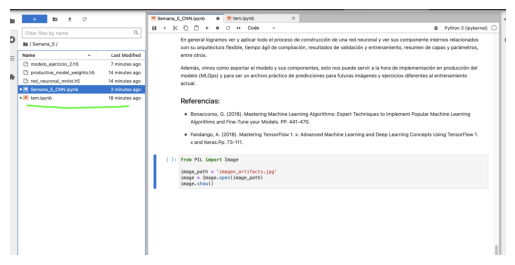

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Ruta de la imagen
image_path = 'artifacts.png'

# Lee la imagen
image = mpimg.imread(image_path)

# Muestra la imagen
plt.imshow(image)
plt.axis('off')  # Opcional: para ocultar los ejes
plt.show()